In [1]:
import glob
import cv2
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
lst_fire_img = glob.glob('C:/Users/Dell/.keras/fire_dataset/fire_images/*.png')
lst_non_fire_img = glob.glob('C:/Users/Dell/.keras/fire_dataset/non_fire_images/*.png')

In [3]:
lst_non_fire_img

['C:/Users/Dell/.keras/fire_dataset/non_fire_images\\non_fire.1.png',
 'C:/Users/Dell/.keras/fire_dataset/non_fire_images\\non_fire.10.png',
 'C:/Users/Dell/.keras/fire_dataset/non_fire_images\\non_fire.100.png',
 'C:/Users/Dell/.keras/fire_dataset/non_fire_images\\non_fire.101.png',
 'C:/Users/Dell/.keras/fire_dataset/non_fire_images\\non_fire.102.png',
 'C:/Users/Dell/.keras/fire_dataset/non_fire_images\\non_fire.103.png',
 'C:/Users/Dell/.keras/fire_dataset/non_fire_images\\non_fire.104.png',
 'C:/Users/Dell/.keras/fire_dataset/non_fire_images\\non_fire.105.png',
 'C:/Users/Dell/.keras/fire_dataset/non_fire_images\\non_fire.106.png',
 'C:/Users/Dell/.keras/fire_dataset/non_fire_images\\non_fire.107.png',
 'C:/Users/Dell/.keras/fire_dataset/non_fire_images\\non_fire.108.png',
 'C:/Users/Dell/.keras/fire_dataset/non_fire_images\\non_fire.109.png',
 'C:/Users/Dell/.keras/fire_dataset/non_fire_images\\non_fire.11.png',
 'C:/Users/Dell/.keras/fire_dataset/non_fire_images\\non_fire.110.pn

In [4]:
print('Number of images with fire : {}'.format(len(lst_fire_img)))
print('Number of images with fire : {}'.format(len(lst_non_fire_img)))

Number of images with fire : 755
Number of images with fire : 243


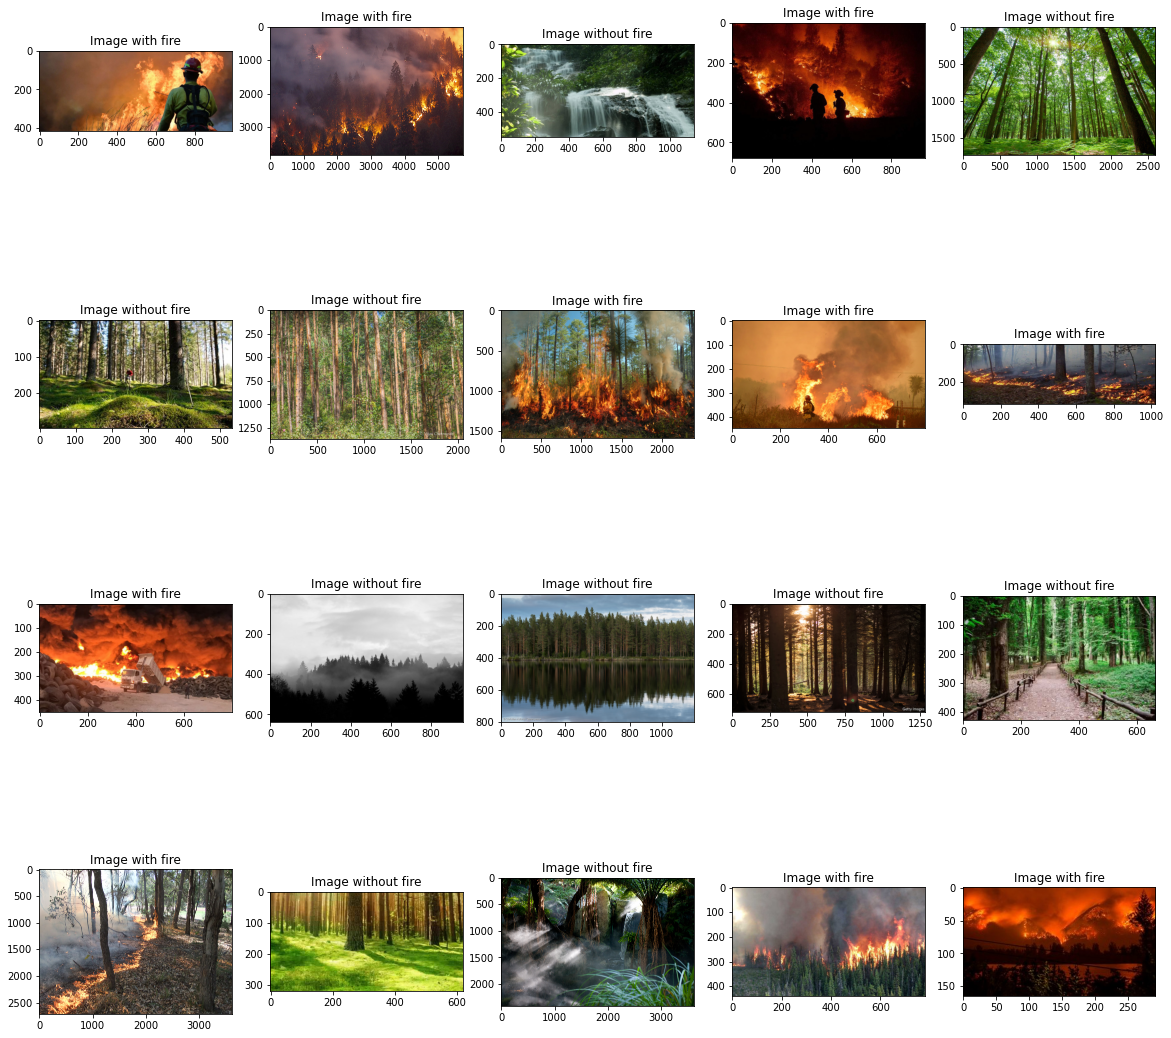

In [5]:
lst_images_random = random.sample(lst_fire_img,10) + random.sample(lst_non_fire_img,10)
random.shuffle(lst_images_random)

plt.figure(figsize = (20,20))

for i in range(len(lst_images_random)):
    
    plt.subplot(4,5,i+1)


    if "non_fire" in lst_images_random[i]:
        img = cv2.imread(lst_images_random[i])
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        plt.imshow(img,cmap = 'gray')
        plt.title('Image without fire')

    else:
        img = cv2.imread(lst_images_random[i])
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        plt.imshow(img,cmap = 'gray')
        plt.title("Image with fire")
        
        
plt.show()

In [6]:
lst_fire = []
for x in lst_fire_img:
    lst_fire.append([x,1])
lst_nn_fire = []
for x in lst_non_fire_img:
    lst_nn_fire.append([x,0])
lst_complete = lst_fire + lst_nn_fire
random.shuffle(lst_complete)

In [7]:
df = pd.DataFrame(lst_complete,columns = ['files','target'])
df.head(10)

,files,target
0,C:/Users/Dell/.keras/fire_dataset/fire_images\...,1
1,C:/Users/Dell/.keras/fire_dataset/non_fire_ima...,0
2,C:/Users/Dell/.keras/fire_dataset/fire_images\...,1
3,C:/Users/Dell/.keras/fire_dataset/fire_images\...,1
4,C:/Users/Dell/.keras/fire_dataset/fire_images\...,1
5,C:/Users/Dell/.keras/fire_dataset/non_fire_ima...,0
6,C:/Users/Dell/.keras/fire_dataset/fire_images\...,1
7,C:/Users/Dell/.keras/fire_dataset/fire_images\...,1
8,C:/Users/Dell/.keras/fire_dataset/non_fire_ima...,0
9,C:/Users/Dell/.keras/fire_dataset/non_fire_ima...,0


We have a problem with image 189 in non_fire_images so we drop it

In [8]:
#filepath_img = 'C:/Users/Dell/.keras/fire_dataset/non_fire_images/non_fire.189.png'
#df = df[(df.files != filepath_img)]

In [9]:
#df.shape

In [10]:
#df[(df.files != filepath_img)].shape

In [11]:
#df[df['files'] == filepath_img].index

In [12]:
#df.drop( df[df['files'] == filepath_img].index, inplace=True )

In [13]:
#df.shape

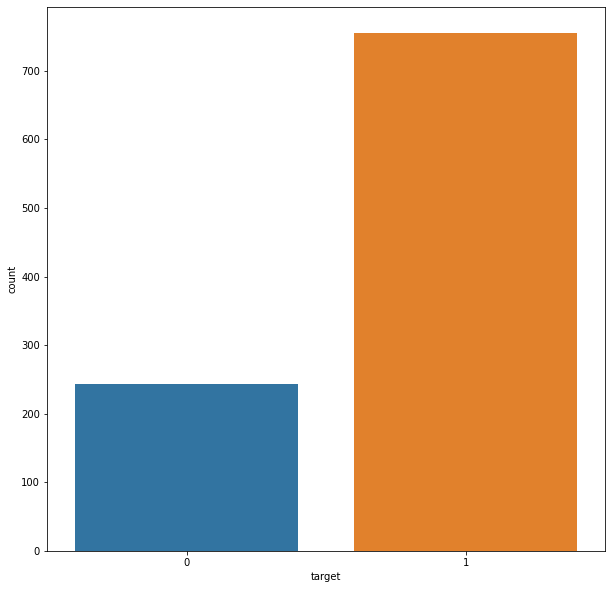

In [14]:
plt.figure(figsize = (10,10))
sns.countplot(x = "target", data = df)

plt.show()

###### We preprocess all the images

In [15]:
def preprocessing_image(filepath):
    img = cv2.imread(filepath) #read
    if img is None:
        print("Error: Could not load image")
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR) #convert
    img = cv2.resize(img,(196,196))  # resize
    img = img / 255 #scale
    return img 

In [16]:
def create_format_dataset(dataframe):
    X = []
    y = []
    for f,t in dataframe.values:
        X.append(preprocessing_image(f))
        y.append(t)
  
    return np.array(X),np.array(y)

In [17]:
img_demo = preprocessing_image('C:\\Users\\Dell\\.keras\\fire_dataset\\non_fire_images\\non_fire.188.png')

In [18]:
img_demo

array([[[0.10196078, 0.05882353, 0.02352941],
        [0.2745098 , 0.33333333, 0.15686275],
        [0.34901961, 0.4745098 , 0.21568627],
        ...,
        [0.38431373, 0.44705882, 0.49411765],
        [0.51372549, 0.56862745, 0.63921569],
        [0.8       , 0.90588235, 0.98039216]],

       [[0.48627451, 0.49019608, 0.39607843],
        [0.49019608, 0.54117647, 0.39215686],
        [0.35686275, 0.43529412, 0.25098039],
        ...,
        [0.38431373, 0.45098039, 0.50588235],
        [0.42352941, 0.47843137, 0.56470588],
        [0.42745098, 0.5254902 , 0.61176471]],

       [[0.48627451, 0.56078431, 0.39607843],
        [0.41176471, 0.45098039, 0.3372549 ],
        [0.52941176, 0.55686275, 0.47843137],
        ...,
        [0.2627451 , 0.32941176, 0.40392157],
        [0.40392157, 0.46666667, 0.56862745],
        [0.77647059, 0.8627451 , 0.95294118]],

       ...,

       [[0.29019608, 0.2627451 , 0.18823529],
        [0.30588235, 0.27843137, 0.20392157],
        [0.23529412, 0

In [19]:
X, y = create_format_dataset(df)

In [20]:
print(X.shape)
print(y.shape)

(998, 196, 196, 3)
(998,)


###### we split the data in train and test

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y)

In [22]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((698, 196, 196, 3), (300, 196, 196, 3), (698,), (300,))

In [23]:
model = Sequential()

model.add(Conv2D(128,(2,2),input_shape = (196,196,3),activation='relu'))
model.add(Conv2D(64,(2,2),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(2,2),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128))
model.add(Dense(1,activation= "sigmoid"))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 195, 195, 128)     1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 194, 194, 64)      32832     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 97, 97, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 73728)             0

In [25]:
callbacks = [EarlyStopping(monitor = 'val_loss',patience = 10,restore_best_weights=True)]

In [26]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [27]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 30,batch_size = 32,callbacks = callbacks)

Epoch 1/30
 4/22 [====>.........................] - ETA: 1:54 - loss: 3.5567 - accuracy: 0.5000

KeyboardInterrupt: 

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

In [ ]:
plt.figure(figsize = (20,10))

sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

In [ ]:
print(classification_report(y_test,y_pred))